# 12. 퀀트 전략을 이용한 종목선정 (기본)

투자에 필요한 주가, 재무제표, 가치지표 데이터가 준비되었다면 퀀트 전략을 활용해 투자하고자 하는 종목을 선정해야 합니다. 퀀트 투자는 크게 포트폴리오 운용 전략과 트레이딩 전략으로 나눌 수 있습니다. 포트폴리오 운용 전략은 과거 주식 시장을 분석해 좋은 주식의 기준을 찾아낸 후 해당 기준에 만족하는 종목을 매수하거나, 이와 반대에 있는 나쁜 주식을 공매도하기도 합니다. 투자의 속도가 느리며, 다수의 종목을 하나의 포트폴리오로 구성해 운용하는 특징이 있습니다. 반면 트레이딩 전략은 주식이 오르거나 내리는 움직임을 연구한 후 각종 지표를 이용해 매수 혹은 매도하는 전략입니다. 투자의 속도가 빠르며 소수의 종목을 대상으로 합니다. 본 책에서는 퀀트 전략을 이용한 종목선정 및 구성 전략에 대해 먼저 살펴본 후, 트레이딩 전략에 대해 살펴보도록 하겠습니다. 

```{table} 퀀트 투자 종류의 비교
:name: quant_type

| 기준 | 포트폴리오 운용 전략 | 트레이딩 전략 | 
| --- | --- | --- |
| 투자철학	| 규칙에 기반한 투자 | 규칙에 기반한 투자 |
| 투자목적 | 좋은 주식을 매수 | 좋은 시점을 매수 |
| 학문적 기반 |	경제학, 통계학 등	| 통계학, 공학, 정보처리 등 |
| 투자의 속도	| 느림 | 빠름 |
```

주식의 수익률에 영향을 미치는 요소를 팩터(Factor)라고 합니다. 즉 팩터의 강도가 양인 종목들로 구성한 포트폴리오는 향후 수익률이 높을 것으로 예상되며, 팩터의 강도가 음인 종목들로 구성한 포트폴리오는 반대로 향후 수익률이 낮을 것으로 예상됩니다.

팩터에 대한 연구는 학자들에 의해 오랫동안 진행되어 왔지만, 일반 투자자들이 이러한 논문을 모두 찾아보고 연구하기는 사실상 불가능에 가깝습니다. 그러나 최근에는 스마트베타라는 이름으로 팩터 투자가 대중화되고 있습니다. 최근 유행하고 있는 스마트베타 ETF는 팩터를 기준으로 포트폴리오를 구성한 상품으로서, 학계나 실무에서 검증된 팩터 전략을 기반으로 합니다.

해당 상품들의 웹사이트나 투자설명서에는 종목 선정 기준에 대해 자세히 나와 있으므로 스마트베타 ETF에 나와 있는 투자 전략을 자세히 분석하는 것만으로도 훌륭한 퀀트 투자 전략을 만들 수 있습니다.

```{figure} image/factor_smartbeta.png
---
name: factor_smartbeta
---
스마트베타 ETF 전략 예시
```

이번 장에서는 투자에 많이 활용되는 기본적인 팩터에 대해 알아보고, 우리가 구한 데이터를 바탕으로 각 팩터별 투자 종목을 선택하는 방법을 알아보겠습니다.

## 12.1 베타 이해하기

투자자들이라면 누구나 한 번은 베타(Beta)라는 용어를 들어봤을 것입니다. 기본적으로 주식시장의 움직임은 개별 주식의 수익률에 가장 크게 영향을 주는 요소일 수밖에 없습니다. 아무리 좋은 주식도 주식시장이 폭락한다면 같이 떨어지며, 아무리 나쁜 주식도 주식시장이 상승한다면 대부분 같이 오르기 마련입니다.

개별 주식이 전체 주식시장의 변동에 반응하는 정도를 나타낸 값이 베타입니다. 베타가 1이라는 뜻은 주식시장과 움직임이 정확히 같다는 뜻으로서 시장 그 자체를 나타냅니다. 베타가 1.5라는 뜻은 주식시장이 수익률이 +1%일 때 개별 주식의 수익률은 +1.5% 움직이며, 반대로 주식시장의 수익률이 -1%일 때 개별 주식의 수익률은 -1.5% 움직인다는 뜻입니다. 반면 베타가 0.5라면 주식시장 수익률의 절반 정도만 움직이게 됩니다.

```{table} 베타에 따른 개별 주식의 수익률 움직임
:name: beta

| 베타 | 주식시장이 +1% 일 경우 | 주식시장이 -1% 일 경우 | 
| --- | --- | --- |
| 0.5 | +0.5% | -0.5% |
| 1.0 | +1.0% | -1.0% |
| 1.5 | +1.5% | -1.5% |
```

이처럼 베타가 큰 주식은 주식시장보다 수익률의 움직임이 크며, 반대로 베타가 낮은 주식은 주식시장보다 수익률의 움직임이 작습니다. 따라서 일반적으로 상승장이 기대될 때는 베타가 큰 주식에, 하락장이 기대될 때는 베타가 낮은 주식에 투자하는 것이 좋습니다.
주식시장에서 베타는 통계학의 회귀분석모형에서 기울기를 나타내는 베타와 정확히 의미가 같습니다. 회귀분석모형은 $y = a + bx$ 형태로 나타나며, 회귀계수인 $b$는 $x$의 변화에 따른 $y$의 변화의 기울기입니다. 이를 주식에 적용한 모형이 자산가격결정모형(CAPM: Capital Asset Pricing Model)(Sharpe 1964)이며, 그 식은 다음과 같습니다.

$$회귀분석모형:\ y = a + bx$$
$$자산가격결정모형: R_i = R_f + \beta_i \times [R_m - R_f]$$

먼저 회귀분석모형의 상수항인 $a$에 해당하는 부분은 무위험 수익률을 나타내는 $R_f$입니다. 독립변수인 $x$에 해당하는 부분은 무위험 수익률 대비 주식 시장의 초과 수익률을 나타내는 시장위험 프리미엄인 $R_m - R_f$입니다. 종속변수인 $y$에 해당하는 부분은 개별주식의 수익률을 나타내는 $R_i$이며, 최종적으로 회귀계수인 $b$에 해당하는 부분은 개별 주식의 베타입니다.

```{table} 회귀분석모형과 자산가격결정모형의 비교
:name: beta_formulta
| 구분 | 회귀분석모형 | 자산가격결정모형 | 
| --- | --- | --- |
| 상수항 | a | $R_f$ (무위험수익률) |
| 독립변수 | x | $R_m - R_f$ (시장위험 프리미엄) |
| 종속변수 | y | $R_i$ (개별주식의 수익률) |
| 회귀계수 | b | $\beta_i$ (개별주식의 베타) |
```

통계학에서 회귀계수는 $\beta = \frac{cov(x,y)}{\sigma_x^2}$ 형태로 구할 수 있으며, $x$와 $y$에 각각 시장수익률과 개별주식의 수익률을 대입할 경우 개별주식의 베타는 $\beta_i= \rho(i,m) \times\frac{\sigma_i}{\sigma_m}$ 형태로 구할 수 있습니다. 그러나 이러한 수식을 모르더라도 파이썬에서는 간단히 베타를 구할 수 있습니다.

### 12.1.1 베타 계산하기

베타를 구하는 방법을 알아보기 위해 주식시장에 대한 대용치로 KOSPI 200 ETF, 개별주식으로는 전통적 고베타주인 증권주를 이용하겠습니다.

In [1]:
import pandas_datareader as web
import pandas as pd

tickers = ['102110.KS', '039490.KS']

all_data = {}
for ticker in tickers:
    all_data[ticker] = web.DataReader(ticker, 'yahoo', start = "2016-01-01")
    
prices = pd.DataFrame({tic: data['Close'] for tic, data in all_data.items()})
ret = prices.pct_change().dropna()    
ret = ret.loc['2016-01-01':'2020-12-31']

1. KOSPI 200 ETF인 TIGER 200(102110.KS), 증권주인 키움증권(039490.KS)의 티커를 입력합니다.
2. `DataReader()` 함수를 이용하여 해당 티커들의 데이터를 다운로드 받습니다.
3. 종가만을 선택한 후, 데이터프레임 형태로 만들어줍니다.
4. `pct_change()` 함수를 통해 수익률을 계산한 후, NA 데이터는 삭제합니다.
5. 2016년 1월 1일부터 2020년 12월 31일까지의 데이터만 선택합니다.

In [2]:
import statsmodels.api as sm

rm = ret.iloc[:, 0]
ri = ret.iloc[:, 1]
reg = sm.OLS(ri, rm).fit()

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              039490.KS   R-squared (uncentered):                   0.354
Model:                            OLS   Adj. R-squared (uncentered):              0.354
Method:                 Least Squares   F-statistic:                              668.3
Date:                Wed, 14 Apr 2021   Prob (F-statistic):                   7.75e-118
Time:                        14:32:57   Log-Likelihood:                          3020.8
No. Observations:                1219   AIC:                                     -6040.
Df Residuals:                    1218   BIC:                                     -6034.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
102110.KS      1.3665      0.053     25.852      0.000       1.263       1.470
==============================================================================
Omnibus:                      151.608   Durbin-Watson:                   2.189
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              332.513
Skew:                           0.726   Prob(JB):                     6.25e-73
Kurtosis:                       5.106   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
print(reg.params)

102110.KS    1.366499
dtype: float64


증권주를 대상으로 베타를 구하기 위한 회귀분석을 실시합니다. 자산가격결정모형의 수식인 $R_i = R_f + \beta_i \times [R_m - R_f]$ 에서 편의를 위해 무위험 수익률인 $R_f$를 0으로 가정하면, $R_i = \beta_i \times R_m$의 형태로 나타낼 수 있습니다. 이 중 $R_m$는 독립변수인 주식시장의 수익률을 의미하고, $R_i$는 종속변수인 개별 주식의 수익률을 의미합니다.

1. 독립변수는 첫 번째 열인 KOSPI 200 ETF의 수익률을 선택하며, 종속변수는 두번째 열인 증권주의 수익률을 선택합니다.
2. statsmodels 패키지의 `OLS()` 함수를 통해 손쉽게 선형회귀분석을 실시할 수 있으며, 회귀분석의 결과를 reg 변수에 저장합니다.
3. `summary()` 함수는 데이터의 요약 정보를 나타내며, 해당 예시에서는 회귀분석 결과에 대한 정보를 보여줍니다.

회귀분석의 결과 중 가장 중요한 부분은 베타를 나타내는 coef입니다. 베타값이 매우 높아 증권주의 특성인 고베타주임이 확인되며, t값 또한 2 보다 커 매우 유의한 결과입니다.

### 12.1.2 베타 시각화

이제 구해진 베타를 그림으로 표현해보겠습니다.

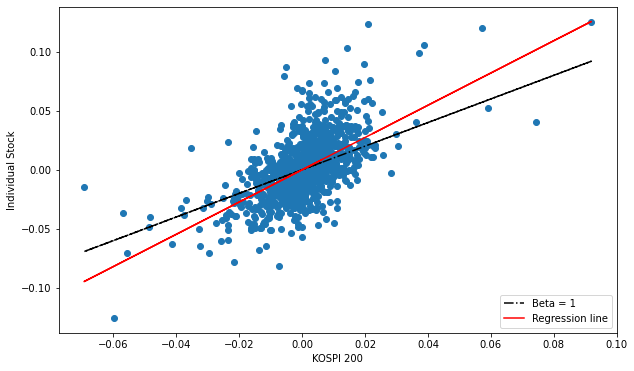

In [14]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(rm, ri) # 원 데이터 산포도
plt.plot(rm, rm, '-.', color='black', label = 'Beta = 1') # beta = 1
plt.plot(rm, reg.fittedvalues, color='red', label = 'Regression line') # 회귀직선
 
plt.xlabel('KOSPI 200')
plt.ylabel('Individual Stock')
ax.legend(loc = 'lower right')
plt.show()

1. 시장 수익률과 개별주식 수익률을 `scatter()` 함수를 이용해 산포도로 그려줍니다.
2. 시장 수익률에 해당하는 부분(Beta = 1)을 검은색 점선으로 그려줍니다.
3. 추정된 회귀식(Regression line)을 붉은색 선으로 그려줍니다.
4. 라벨 및 범례를 입력합니다.

검은색의 점선이 기울기가 1인 경우이며, 주황색의 직선이 증권주의 회귀분석결과를 나타냅니다. 기울기가 1보다 훨씬 가파름이 확인되며, 즉 베타가 1보다 크다는 사실을 알 수 있습니다.


## 12.2 저변동성 전략

금융 시장에서 변동성은 수익률이 움직이는 정도로서, 일반적으로 표준편차가 사용됩니다. 표준편차는 자료가 평균을 중심으로 얼마나 퍼져 있는지를 나타내는 수치로서, 수식은 다음과 같습니다.

$$\sigma = \sqrt{\frac{\sum_{i=1}^{n}{(x_i - \bar{x})^2}}{n-1}}$$

관측값의 개수가 적을 경우에는 수식에 대입해 계산하는 것이 가능하지만, 관측값이 수백 혹은 수천 개로 늘어날 경우 컴퓨터를 이용하지 않고 계산하기는 사실상 불가능합니다. 파이썬에서는 복잡한 계산 과정 없이 `stdev()` 함수를 이용해 간단하게 표준편차를 계산할 수 있습니다.

In [15]:
from statistics import stdev 

example = [85, 76, 73, 80, 72]
stdev(example)

5.357238094391549

개별 주식의 표준편차를 측정할 때는 주식의 가격이 아닌 수익률로 계산해야 합니다. 수익률의 표준편차가 크면 수익률이 위아래로 많이 움직여 위험한 종목으로 여겨집니다. 반면 표준편차가 작으면 수익률의 움직임이 적어 상대적으로 안전한 종목으로 여겨집니다.

전통적 금융 이론에서는 수익률의 변동성이 클수록 위험이 크고, 이런 위험에 대한 보상으로 기대수익률이 높아야 한다고 보았습니다. 따라서 고변동성 종목의 기대수익률이 크고, 저변동성 종목의 기대수익률이 낮은 고위험 고수익이 당연한 믿음이었습니다. 그러나 현실에서는 오히려 변동성이 낮은 종목들의 수익률이 변동성이 높은 종목들의 수익률보다 높은, 저변동성 효과가 발견되고 있습니다. 이러한 저변동성 효과가 발생하는 원인으로는 여러 가설이 있습니다.

1. 투자자들은 대체로 자신의 능력을 과신하는 경향이 있으며, 복권과 같이 큰 수익을 가져다 주는 고변동성 주식을 선호하는 경향이 있습니다. 이러한 결과로 고변동성 주식은 과대 평가되어 수익률이 낮은 반면, 과소 평가된 저변동성 주식들은 높은 수익률을 보이게 됩니다. (Brunnermeier and Parker 2005)

2. 대부분 기관투자가들이 레버리지 투자가 되지 않는 상황에서, 벤치마크 대비 높은 성과를 얻기 위해 고변동성 주식에 투자하는 경향이 있으며, 이 또한 고변동성 주식이 과대 평가되는 결과로 이어집니다. (Baker, Bradley, and Wurgler 2011)

3. 시장의 상승과 하락이 반복됨에 따라 고변동성 주식이 변동성 손실(Volatility Drag)로 인해 수익률이 하락하게 되는 이유도 있습니다. (Sefton et al. 2011)

변동성이 크다는 것은 크게 벌 가능성도 있지만, 반대로 크게 잃을 가능성도 존재합니다. 큰 손실을 복구하기 위해서는 더욱 큰 수익률을 기록해야 합니다. 예를 들어 10,000원 에서 50%의 손실을 본다면 5,000원이 되지만, 원금이 되기 위해서는 50%가 아닌 100% 수익을 거두어야 합니다.

{numref}`factor_voldrag`는 변동성이 각각 5%, 10%, 15%, 20%, 25% 인 주식이 상승과 하락을 반복하는 경우를 시뮬레이션 한 것입니다. 변동성이 클수록 처음 상승시점에서 상승폭은 크지만, 다음 하락시점에서 원금 대비 하락폭 또한 큽니다. 이처럼 상승과 하락이 반복될 경우 변동성의 비대칭으로 인해 장기적으로 변동성이 작은 주식의 수익률이 더 높게 됩니다.

```{figure} image/factor_voldrag.png
---
name: factor_voldrag
---
각 변동성에 따른 누적 수익률 그래프
```

주식의 위험은 변동성뿐만 아니라 베타 등 여러 지표로도 측정할 수 있습니다. 저변동성 효과와 비슷하게 고유변동성이 낮은 주식의 수익률이 높은 저고유변동성(Ang et al. 2009)효과, 베타가 낮은 주식의 수익률이 오히려 높은 저베타 효과(Baker, Bradley, and Taliaferro 2014)도 발견되고 있으며, 이러한 효과들을 합쳐 저위험 효과라고 부르기도 합니다.

### 12.2.1 변동성 별 누적 수익률

유럽의 퀀트 기반 자산운용사인 Robeco에서는 1929년부터 변동성에 따라 구성된 포트폴리오의 역사적 수익률을 제공하고 있습니다. 이를 통해 정말로 저변동성 포트폴리오가 고변동성 포트폴리오보다 우수한 성과를 보였는지 확인해보도록 하겠습니다.

```
https://www.robeco.com/en/insights/2019/01/data-sets-volatility-sorted-portfolios.html
```

먼저 해당 페이지의 [Download the data]에 위치한 엑셀 데이터를 파이썬에서 불러오도록 하겠습니다.


In [31]:
import pandas as pd

url = 'http://www.robeco.com/docm/docu-robeco-data-sets-volatility-sorted-portfolios.xlsx'
data = pd.read_excel(url, sheet_name = 'Conservative Formula 2021', skiprows = 2)
cut_row = data[data.isnull().all(axis=1) == True].index[0]

data = data.iloc[0:cut_row, 0:11].set_index(data.columns[0])
data = data.apply(pd.to_numeric)
data.index.name = 'Date'

data.head()

,Low volatility,2,3,4,5,6,7,8,9,High volatility
Date,,,,,,,,,,
1929-01-31,0.049068,0.055891,0.028393,0.027992,0.028601,0.042569,0.019569,0.026325,0.068246,-0.015916
1929-02-28,0.001052,-0.004374,0.001483,0.010956,0.026740,-0.017976,0.020075,-0.012382,0.013717,0.057899
1929-03-29,-0.009444,-0.010437,-0.018429,-0.030655,-0.026962,-0.039162,-0.033466,-0.052638,-0.011746,-0.020680
1929-04-30,-0.001644,0.018043,0.010668,0.016756,-0.003668,0.045984,0.019777,-0.003291,0.029879,-0.021943
1929-05-31,0.003102,-0.058104,-0.052835,-0.050367,-0.096969,-0.066940,-0.109504,-0.170854,-0.142702,-0.144243


1. 해당 url을 입력합니다.
2. `read_excel()` 함수를 통해 엑셀 데이터를 읽어오며, sheet명과 스킵할 행 개수를 입력합니다.
3. 데이터 하단에는 이를 설명하는 자료이므로, 데이터에 해당하는 테이블이 몇번째 행까지 위치하는지를 알 필요가 있습니다. 모든 열이 NA인 행이 몇번째 인지를 찾아줍니다.
4. 변동성 별 수익률에 해당하는 첫번째부터 cut_row 행까지를 선택한 후, 인덱스를 날짜에 해당하는 열로 변경합니다.
5. `to_numeric()` 함수를 통해 모든 데이터를 숫자 형태로 변경합니다.
6. 인덱스의 이름을 변경합니다.

해당 수익률은 다음과 같이 계산되었습니다. 먼저 과거 36개월 수익률의 변동성을 기준으로 매월 말 10개 포트폴리오로 나눈 후 한달 뒤 각 포트폴리오의 수익률을 계산합니다. 그 후 다시 과거 36개월 기준으로 포트폴리오를 나눈 후 한달 후에 수익률을 계산하며, 이러한 작업을 매월 반복해 나갑니다. Low volatility는 과거 수익률의 변동성이 가장 낮았던 종목들로 이루어진 포트폴리오이며, 숫자가 커질수록 변동성이 점점 더 큰 종목들로 이루어진 포트폴리오 입니다. High volatility는 변동성이 가장 큰 종목들로 이루어진 포트폴리오 입니다. 각 포트폴리오의 평균 수익률을 확인해보도록 하겠습니다.

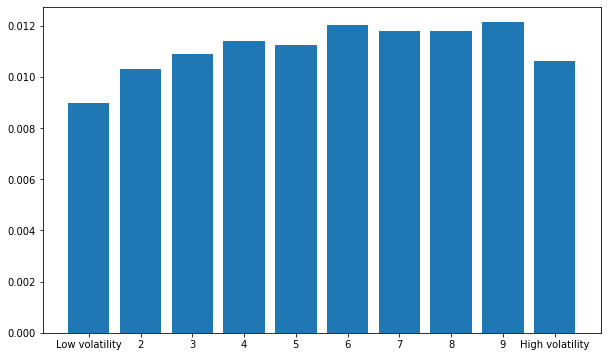

In [66]:
import matplotlib.pyplot as plt
import numpy as np

x =  np.arange(10)
y = data.mean()
labels = data.columns

fig, ax = plt.subplots(figsize=(10, 6))
plt.bar(x, y)
plt.xticks(x, labels)
plt.show()

변동성이 높을수록 수익률 역시 높은 경향이 있지만, 가장 변동성이 높은 'High volatility' 포트폴리오의 수익률은 그렇지 못합니다. 이는 변동성이 지나치게 높은 종목은 상장폐지 등 악재로 이어질 가능성이 높기 때문입니다. 이번에는 복리를 고려한 누적 수익률을 살펴보도록 하겠습니다.

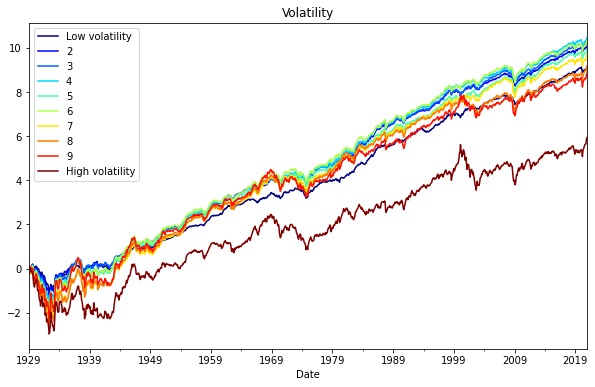

In [71]:
from matplotlib import cm

data_cum = np.log(1+data).cumsum()
data_cum.plot(figsize = (10, 6), colormap = cm.jet, title = 'Volatility')
plt.show()

먼저 수익률을 로그수익률로 변환한 후, 누적합을 계산합니다. 변동성 별 포트폴리오의 누적 수익률을 살펴보면, 변동성이 낮은 포트폴리오가 높은 포트폴리오 보다 장기적으로 수익률이 높습니다. 또한 변동성이 지나치게 높은 포트폴리오는 매우 부진한 성과를 보이므로, 이러한 종목들은 피하는 것이 좋습니다.

### 12.2.2 저변동성 포트폴리오 구하기: 일간 기준

먼저 최근 1년 일간 수익률 기준 변동성이 낮은 30종목을 선택하겠습니다.

In [135]:
import pandas as pd
import numpy as np
from statistics import stdev 

KOR_price = pd.read_csv('data/KOR_price.csv', index_col = 0)
KOR_ticker = pd.read_csv('data/KOR_ticker.csv', index_col=0)
KOR_ticker['종목코드'] = KOR_ticker['종목코드'].astype(np.str).str.zfill(6)

ret = KOR_price.pct_change()
std_12m_daily  = ret.iloc[-252: ].apply(stdev, axis = 0)*np.sqrt(252)

1. 저장해둔 가격 정보와 티커 정보를 불러옵니다. 
2. `pct_change()` 함수를 통해 수익률을 구합니다.
3. 데이터프레임 하단의 252개, 즉 최근 252 일의 데이터를 선택합니다. (주식 시장의 1년 영업일은 대략 252일 입니다). `apply()` 함수를 통해 stdev 즉 변동성을 계산해주며, 연율화를 해주기 위해 `sqrt()` 함수를 통해 $\sqrt{252}$ 를 곱해줍니다.

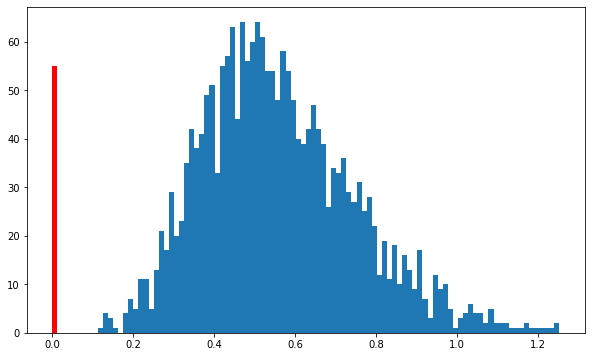

In [136]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
n, bins, patches = plt.hist(std_12m_daily, bins=100)
patches[0].set_fc('red')
plt.show()

변동성을 히스토그램으로 나타내보면, 0 에 위치하는 종목들이 다수 있습니다. 해당 종목들은 최근 1년간 거래정지로 인해 가격이 변하지 않았고, 이로 인해 변동성이 없는 종목들입니다. 해당 종목들은 NA로 처리해줍니다.

In [138]:
std_12m_daily[std_12m_daily == 0] = np.nan

다음으로 일간 수익률 기준 변동성이 낮은 30종목의 변동성을 확인해보겠습니다.

In [139]:
invest_lowvol = (std_12m_daily.rank() <= 30).values

print(std_12m_daily[invest_lowvol])

033780    0.213817
030200    0.220826
215600    0.136249
267980    0.207293
001720    0.191573
072710    0.180600
016800    0.118965
000480    0.197399
002960    0.187043
004690    0.191838
002810    0.202861
049180    0.196368
018120    0.130561
015360    0.189513
004890    0.130267
036190    0.196859
004970    0.199972
100250    0.181985
117580    0.141714
005990    0.213116
034590    0.138567
040420    0.144117
007590    0.215019
005190    0.204591
109860    0.202258
004450    0.220137
000850    0.185773
014100    0.156389
084670    0.202722
066790    0.130025
dtype: float64


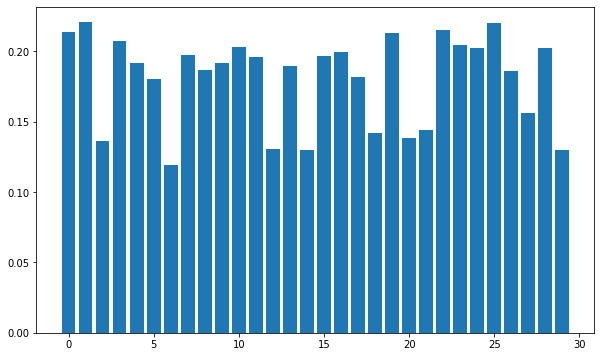

In [140]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.bar(x = np.arange(30), height = std_12m_daily[invest_lowvol])
plt.show()

`rank()` 함수를 통해 순위를 구할 수 있으며, 파이썬은 기본적으로 오름차순 즉 가장 낮은값의 순위가 1이 됩니다. 따라서 변동성이 낮을수록 높은 순위가 되며, 30위 이하의 순위를 선택하면 변동성이 낮은 30종목이 선택됩니다. 또한 그림을 통해 해당 종목들의 변동성을 확인해볼 수도 있습니다.

이번에는 해당 종목들의 티커 및 종목명을 확인하겠습니다.

In [141]:
invest_lowvol_df = KOR_ticker.loc[invest_lowvol, ['종목코드', '종목명']]
invest_lowvol_df['변동성'] = std_12m_daily[invest_lowvol].round(4).values

invest_lowvol_df

,종목코드,종목명,변동성
31,033780,KT&G,0.2138
47,030200,KT,0.2208
287,215600,신라젠,0.1362
409,267980,매일유업,0.2073
433,001720,신영증권,0.1916
616,072710,농심홀딩스,0.1806
643,016800,퍼시스,0.1190
651,000480,조선내화,0.1974
663,002960,한국쉘석유,0.1870
673,004690,삼천리,0.1918


티커와 종목명, 연율화 변동성을 확인할 수 있습니다.

### 12.2.3 저변동성 포트폴리오 구하기: 주간 기준

이번에는 일간 변동성이 아닌 주간 변동성을 기준으로 저변동성 종목을 선택하겠습니다.

In [142]:
KOR_price.index = pd.to_datetime(KOR_price.index)
ret_w = KOR_price.resample('W').ffill().pct_change()
std_12m_weekly = ret_w.iloc[-52: ].apply(stdev, axis = 0)*np.sqrt(52)
std_12m_weekly[std_12m_weekly == 0] = np.nan

1. 가격 데이터프레임의 인덱스를 datetime 형태로 변경해줍니다.
2. `resample()` 함수를 이용해 주간 데이터로 변경한 후, `pct_change()` 함수를 이용해 수익률을 계산합니다.
3. 데이터프레임 하단의 52개, 즉 최근 52 주의 데이터를 선택합니다. (주식 시장의 1년 영업일은 대략 52주 입니다). `apply()` 함수를 통해 stdev 즉 변동성을 계산해주며, 연율화를 해주기 위해 `sqrt()` 함수를 통해 $\sqrt{52}$ 를 곱해줍니다.
4. 변동성이 0인 종목은 NA로 변경해줍니다.

이후 과정은 위와 동일합니다.

In [143]:
invest_lowvol_weekly = (std_12m_weekly.rank() <= 30).values

invest_lowvol_weekly_df = KOR_ticker[invest_lowvol_weekly][['종목코드', '종목명']]
invest_lowvol_weekly_df['변동성'] = std_12m_weekly[invest_lowvol_weekly].round(4).values

invest_lowvol_weekly_df

,종목코드,종목명,변동성
148,007310,오뚜기,0.1943
287,215600,신라젠,0.0669
409,267980,매일유업,0.1895
616,072710,농심홀딩스,0.1525
643,016800,퍼시스,0.0842
651,000480,조선내화,0.1802
663,002960,한국쉘석유,0.1778
978,018120,진로발효,0.1052
989,015360,예스코홀딩스,0.1489
1015,004890,동일산업,0.1299


주간 수익률의 변동성이 낮은 30종목을 선택해 종목코드, 종목명, 연율화 변동성을 확인합니다.

In [144]:
print( pd.merge(invest_lowvol_df['종목명'], invest_lowvol_weekly_df['종목명'], how = 'inner') )

        종목명
0       신라젠
1      매일유업
2     농심홀딩스
3       퍼시스
4      조선내화
5     한국쉘석유
6      진로발효
7    예스코홀딩스
8      동일산업
9    금화피에스시
10     신라교역
11    진양홀딩스
12    대성에너지
13    매일홀딩스
14   인천도시가스
15  정상제이엘에스
16    동방아그로
17     동성화학
18     동일금속
19     삼화왕관
20     화천기공
21     씨씨에스


`merge()` 함수 내에 inner를 통해 일간 변동성 기준과 주간 변동성 기준 모두에 포함되는 종목을 찾을 수 있습니다.

## 12.3 모멘텀 전략

투자에서 모멘텀이란 주가 혹은 이익의 추세로서, 상승 추세의 주식은 지속적으로 상승하며 하락 추세의 주식은 지속적으로 하락하는 현상을 말합니다. 모멘텀의 종류는 크게 기업의 이익에 대한 추세를 나타내는 이익 모멘텀(Rendleman Jr, Jones, and Latane 1982)과 주가의 모멘텀에 대한 가격 모멘텀이 있으며, 이 중에서 3개월에서 12개월 가격 모멘텀을 흔히 모멘텀이라고 합니다. 즉 과거 12개월 수익률이 높았던 종목이 계속해서 상승하는 현상을 모멘텀이라 합니다.

모멘텀 현상이 발생하는 가장 큰 원인은 투자자들의 심리적 편향 때문입니다{cite}(Hurst, Ooi, and Pedersen 2013). 펀더멘털 가치에는 변화가 생겼지만 사람들의 과소반응으로 인해 주가는 서서히 오르게 시작합니다. 그 후 이 추세는 양떼효과로 인한 과잉반응으로 지속적으로 상승하여 펀더멘털을 초과하게 되며, 그 결과 하락 반전으로 이어집니다.

```{figure} image/factor_momentum.png
---
name: factor_momentum
---
추세의 라이프 사이클

출처: Hurst, Ooi, and Pedersen (2013)
```

```{note}
계산 기간에 따른 모멘텀의 종류
- 단기 모멘텀: 최근 한 주 혹은 1개월 수익률이 높을(수록) 차월 수익률이 낮은(높은) 현상. 단기 수익률 반전 현상이라고도 함. (Lehmann 1990, Jegadeesh 1990)
- 중기 모멘텀: 최근 3-12개월 수익률이 높았던 주식이 향후에도 지속적으로 상승하는 현상. (Jegadeesh and Titman 1993)
- 장기 모멘텀: 최근 3-5년 수익률이 낮았던 종목들이, 수익률이 높았던 종목보다 성과가 높은 현상. 장기 수익률 반전 현상이라고도 함. (De Bondt and Thaler 1985)
```


### 12.3.1 모멘텀 별 누적 수익률

케네스 프렌치 교수의 Data Library에는 각종 팩터에 관한 수익률이 매월 업데이트 되며, 단기/중기/장기 모멘텀 데이터 역시 확인할 수 있습니다. 

```
https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html
```

또한 `DataReader()` 함수에는 해당 사이트의 데이터를 읽어오는 기능이 내장되어, 팩터 데이터를 매우 쉽게 분석할 수 있습니다.

#### 12.3.1.1 `DataReader()` 함수를 이용한 팩터 데이터 다운로드

`DataReader()` 함수를 이용하면 프렌치 라이브러리의 모든 데이터를 불러올 수 있습니다. 어떠한 항목이 있는지 확인해보도록 하겠습니다.

In [149]:
import pandas_datareader.data as web  # module for reading datasets directly from the web
from pandas_datareader.famafrench import get_available_datasets

datasets = get_available_datasets()
datasets[1:10]

['F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div']

#### 12.3.1.2 단기 모멘텀

먼저 단기 모멘텀, 즉 최근 1개월 수익률을 기준으로 구성된 포트폴리오의 수익률을 비교해보겠습니다. 프렌치 라이브러리에서 해당 데이터의 이름은 '10_Portfolios_Prior_1_0' 입니다.

In [8]:
import pandas_datareader.data as web

df_short = web.DataReader('10_Portfolios_Prior_1_0', 'famafrench', start = '1900-01-01')[0]
df_short.head()

,Lo PRIOR,PRIOR 2,PRIOR 3,PRIOR 4,PRIOR 5,PRIOR 6,PRIOR 7,PRIOR 8,PRIOR 9,Hi PRIOR
Date,,,,,,,,,,
1926-02,-7.81,-5.00,-3.97,-3.74,-4.75,-1.32,-1.79,-1.51,-2.60,-5.29
1926-03,-17.24,-12.06,-12.10,-5.31,-8.53,-4.50,-4.73,-4.91,-3.29,-9.56
1926-04,1.28,1.90,2.13,5.14,4.05,3.64,4.57,3.42,4.24,3.39
1926-05,-3.28,0.90,-1.56,1.06,1.98,2.62,1.45,0.39,1.38,1.22
1926-06,7.43,8.25,11.65,5.72,7.86,4.71,4.00,4.06,3.55,3.10


`DataReader()` 함수 내에 원하는 데이터 명을 입력한 후 데이터 출처인 'famafrench', 시작일자를 입력하면 웹페이지의 데이터가 다운로드 됩니다. 각 딕셔너리에는 시가총액가중, 동일가중, 팩터에 대한 설명이 나와있으므로, 시가총액가중에 해당하는 첫번째 값을 선택합니다. Lo PRIOR는 최근 1개월 수익률이 낮았던 종목들의 포트폴리오이며, 반대로 Hi PRIOR는 수익률이 높았던 종목들의 포트폴리오 입니다.

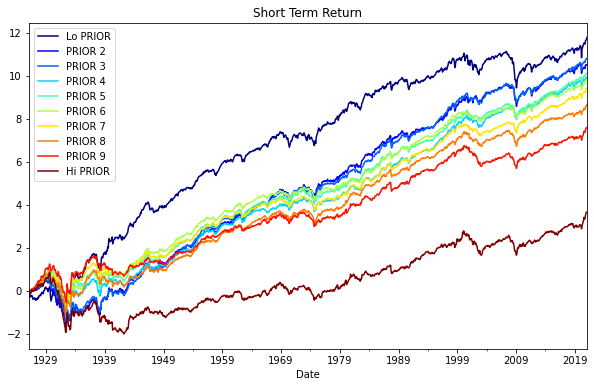

In [9]:
import matplotlib.pyplot as plt
from matplotlib import cm

df_short_cum = np.log(1+df_short/100).cumsum()
df_short_cum.plot(figsize = (10, 6), colormap=cm.jet, title = 'Short Term Return')
plt.show()

해당 사이트의 데이터는 1이 1%를 의미하므로, 올바른 계산을 위해 100으로 나누어줍니다. 그 후 로그수익률을 계산한 후 누적값을 구합니다. 누적 수익률을 확인해보면, 최근 1개월 수익률이 낮은 포트폴리오의 수익률이 높은 포트폴리오의 수익률보다 장기적으로 우수한, 단기 수익률 반전 현상이 존재함이 확인됩니다.


```{note}
원하는 데이터의 이름을 찾는법은 다음과 같습니다. 먼저 홈페이지에서 원하는 데이터를 찾은 후, [CSV] 글자에서 마우스를 우클릭 해 [링크 주소 복사]를 누릅니다. 단기 모멘텀에 해당하는 **10 Portfolios Formed on Short-Term Reversal** 의 다운로드 링크를 메모장 등에서 확인해보면 다음과 같습니다.

https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/10_Portfolios_Prior_1_0_CSV.zip

이 중 끝부분의 **10_Portfolios_Prior_1_0_CSV** 에서 **_CSV**를 제외한 글자를 `DataReader()` 함수 내에 입력하면 해당 데이터가 다운로드 됩니다.

```{figure} image/french_link.png
---
name: french_link
---
링크 주소의 확인
```

#### 12.3.1.2 중기 모멘텀

이번에는 가장 일반적인 모멘텀, 즉 최근 12개월 수익률을 기준으로 구성된 포트폴리오의 수익률을 확인해보겠습니다. 해당 데이터의 이름은 '10_Portfolios_Prior_12_2' 입니다.

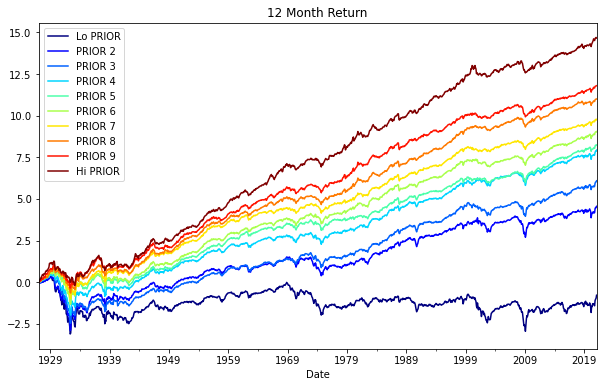

In [156]:
df_mom = web.DataReader('10_Portfolios_Prior_12_2', 'famafrench', start = '1900-01-01')[0]
df_mom_cum = np.log(1+df_mom/100).cumsum()
df_mom_cum.plot(figsize = (10, 6), colormap=cm.jet, title = '12 Month Return')
plt.show()

누적수익률을 확인해보면, 최근 12개월 수익률이 높을 수록(Hi PRIOR) 향후에도 지속적으로 수익률이 높은 '모멘텀 현상'이 존재합니다.

#### 12.3.1.3 장기 모멘텀

마지막으로 최근 5년간 수익률을 기준으로 구성된 장기 모멘텀 포트폴리오의 수익률을 확인해보겠습니다. 해당 데이터의 이름은 '10_Portfolios_Prior_60_13' 입니다.

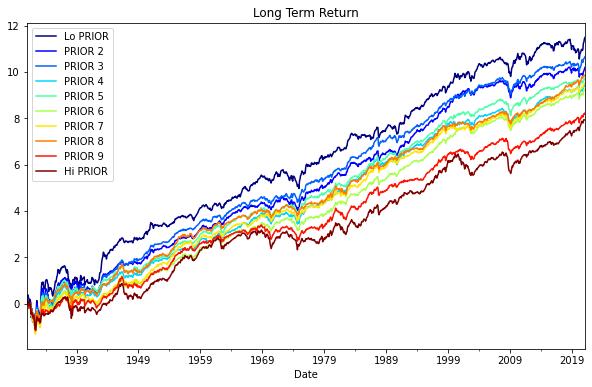

In [158]:
import pandas_datareader.data as web
from matplotlib import cm

df_long = web.DataReader('10_Portfolios_Prior_60_13', 'famafrench', start = '1900-01-01')[0]
df_long_cum = np.log(1+df_long/100).cumsum()
df_long_cum.plot(figsize = (10, 6), colormap=cm.jet, title = 'Long Term Return')
plt.show()

누적수익률을 확인해보면, 최근 60개월 수익률이 낮을 수록(Lo PRIOR) 향후에도 지속적으로 수익률이 높은 '장기 수익률 반전 현상'이 존재합니다.

### 12.3.2 모멘텀 포트폴리오 구하기: 12개월 모멘텀

먼저 최근 1년 동안의 수익률이 높은 30종목을 선택하겠습니다.

In [162]:
import pandas as pd
import numpy as np
from statistics import stdev 

KOR_price = pd.read_csv('data/KOR_price.csv', index_col = 0)
KOR_ticker = pd.read_csv('data/KOR_ticker.csv', index_col=0)
KOR_ticker['종목코드'] = KOR_ticker['종목코드'].astype(np.str).str.zfill(6)

ret = KOR_price.pct_change()
ret_12m = ret.iloc[-252: ].apply(lambda x: (x+1).prod()-1)

1. 가격 정보와 티커 정보를 불러옵니다.
2. `pct_change()` 함수를 통해 수익률을 계산합니다.
3. 최근 252일 수익률을 선택한 후, prod() 함수를 이용해 각 종목의 누적수익률을 계산해줍니다. (누적수익률: $\prod_{i=1}^n(1+r_i)-1$)

In [179]:
invest_mom = (ret_12m.rank(ascending = False) <= 30).values

invest_mom_df = KOR_ticker[invest_mom][['종목코드', '종목명']]
invest_mom_df['수익률'] = ret_12m[invest_mom].round(4).values

invest_mom_df

,종목코드,종목명,수익률
32,011200,HMM,8.3364
90,112610,씨에스윈드,4.9491
96,336260,두산퓨얼셀,8.0516
169,298050,효성첨단소재,4.9561
179,323990,박셀바이오,8.8404
188,194480,데브시스터즈,19.7658
245,041190,우리기술투자,5.1697
250,027360,아주IB투자,6.2736
292,217270,넵튠,4.6737
323,100090,삼강엠앤티,7.0312


`rank()` 함수를 통해 순위를 구합니다. 모멘텀의 경우 높을수록 좋은 내림차순으로 순위를 계산해야 하므로 `ascending = False`를 설정해줍니다. 12개월 누적수익률이 높은 종목들이 선택됨이 확인됩니다.

### 12.3.3 모멘텀 포트폴리오 구하기: 위험조정 수익률

단순히 과거 수익률로만 모멘텀 종목을 선택하면 각종 테마나 이벤트에 따른 급등으로 인해 변동성이 지나치게 높은 종목이 있을 수도 있습니다. 누적수익률을 변동성으로 나누어 위험을 고려해줄 경우, 이러한 종목은 제외되며 상대적으로 안정적인 모멘텀 종목을 선택할 수 있습니다. 이를 흔히 샤프지수라고도 합니다.

$$위험조정\ 수익률 = \frac{누적수익률}{변동성}$$

In [180]:
ret_12m = ret.iloc[-252: ].apply(lambda x: (x+1).prod()-1)
std_12m = ret.iloc[-252: ].apply(stdev, axis = 0)*np.sqrt(252)

sharpe_12m = ret_12m / std_12m

1. 분자에 해당하는 최근 1년 누적수익률을 계산합니다.
2. 분모에 해당하는 연율화 변동성을 계산합니다.
3. 수익률을 변동성으로 나누어 위험조정 수익률을 계산해줍니다.

In [181]:
invest_mom_sharpe = (sharpe_12m.rank(ascending = False) <= 30).values

invest_mom_sharpe_df = KOR_ticker[invest_mom_sharpe][['종목코드', '종목명']]
invest_mom_sharpe_df['수익률'] = ret_12m[invest_mom_sharpe].round(4).values
invest_mom_sharpe_df['변동성'] = std_12m[invest_mom_sharpe].round(4).values
invest_mom_sharpe_df['위험조정 수익률'] = sharpe_12m[invest_mom_sharpe].round(4).values

invest_mom_sharpe_df

,종목코드,종목명,수익률,변동성,위험조정 수익률
5,035720,카카오,2.4766,0.3841,6.4481
32,011200,HMM,8.3364,0.6318,13.1938
90,112610,씨에스윈드,4.9491,0.6666,7.4242
96,336260,두산퓨얼셀,8.0516,0.9573,8.4105
119,066970,엘앤에프,4.2721,0.6577,6.4951
130,298020,효성티앤씨,4.2000,0.5970,7.0352
169,298050,효성첨단소재,4.9561,0.5968,8.3039
175,042700,한미반도체,3.5235,0.5463,6.4502
188,194480,데브시스터즈,19.7658,0.9690,20.3979
234,002840,미원상사,2.8860,0.3546,8.1383


티커와 종목명, 누적수익률, 변동성, 위험조정 수익률을 확인할 수 있습니다. 다음으로 위험조정 수익률 상위 30종목의 가격 그래프를 확인해보도록 하겠습니다.

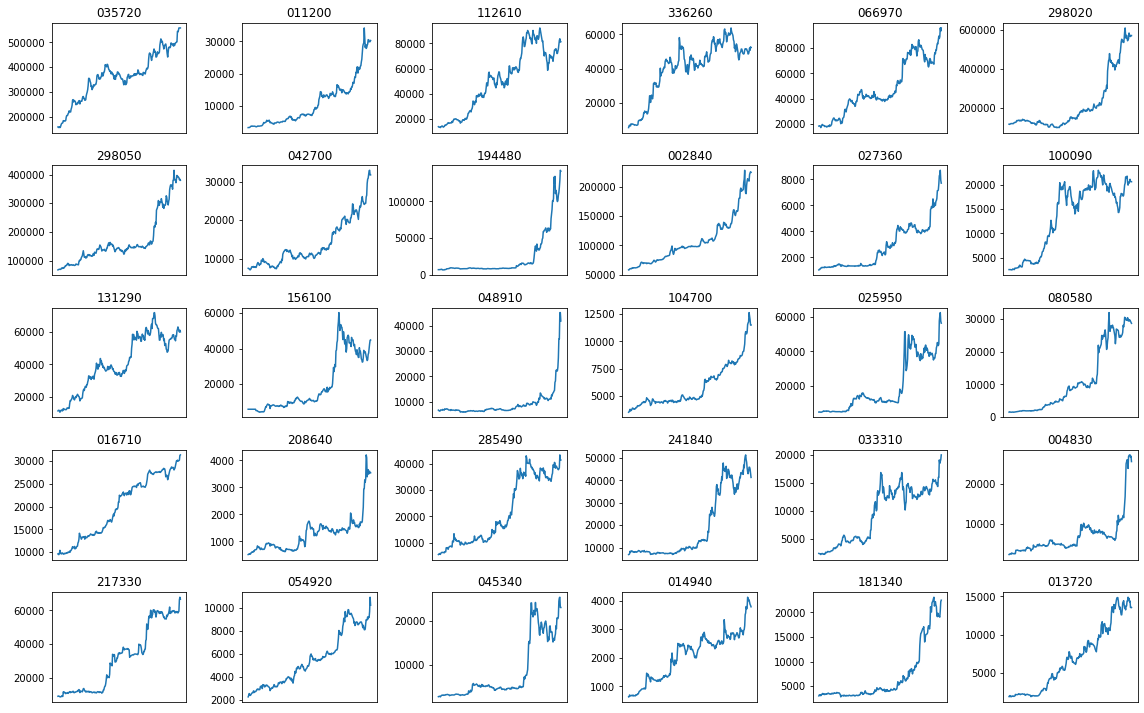

In [182]:
import matplotlib.pyplot as plt
import numpy as np

select_sharpe = KOR_price.iloc[-252:, invest_mom_sharpe]
x = select_sharpe.index.values

fig, axes = plt.subplots(5, 6, figsize=(16, 10), sharex=True, sharey=False)

for n, ax in enumerate(axes.flatten()):
    ax.plot(x, select_sharpe.iloc[:, n])                   
    ax.set_title(select_sharpe.columns[n], size = 12)

plt.xticks([])
fig.tight_layout() 
plt.show()

### 12.3.4 K-Ratio

위 예제를 통해 수익률에 위험을 조정하기는 했지만, 일부 종목의 경우 최근 주가가 급등하여 누적수익률 역시 높게 나타나는 현상이 벌어지고는 합니다. 그러나 좋은 모멘텀이란 단순히 많이 상승한 것이 아닌, 꾸준하게 상승하는 종목입니다.

```{figure} image/factor_k.png
---
name: factor_k
---
모멘텀의 종류
```

동일한 누적수익률을 가진 두 종목이 있습니다. A의 경우 상승폭이 작다가 최근 급등하여 누적수익률이 높아진 경우입니다. 반면 B의 경우 꾸준하게 상승하여 누적수익률이 높아진 경우입니다. 이처럼 꾸준한 상승을 측정하는 지표가 K-Ratio 입니다(Kestner 2013). 해당 지수는 다음과 같습니다.

$$K-Ratio = \frac{누적수익률의\ 기울기}{표준\ 오차}$$

누적수익률이 높을수록 기울기도 커져 분자는 커집니다. 또한 추세가 꾸준할수록 표준 오차가 작아 분자는 작아집니다. 따라서 추세가 꾸준하게 많이 상승할수록 K-Ratio는 증가하게 됩니다. 이번에는 K-Ratio가 높은 30종목을 선택하겠습니다.

In [196]:
import pandas as pd
import numpy as np


KOR_price = pd.read_csv('data/KOR_price.csv', index_col = 0)
KOR_ticker = pd.read_csv('data/KOR_ticker.csv', index_col=0)
KOR_ticker['종목코드'] = KOR_ticker['종목코드'].astype(np.str).str.zfill(6)

ret = KOR_price.pct_change()
ret_cumindex = ret.iloc[-252: ].add(1).cumprod().add(-1)

1. 가격 정보와 티커 정보를 불러옵니다.
2. `pct_change()` 함수를 통해 수익률을 계산합니다.
3. 최근 252일 수익률을 선택한 후, 시간에 따른 누적수익률을 계산합니다.

In [197]:
import statsmodels.api as sm

x = np.array(range(252))
y = ret_cumindex.iloc[:, 0].values

reg = sm.OLS(y, x).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.936
Model:                            OLS   Adj. R-squared (uncentered):              0.935
Method:                 Least Squares   F-statistic:                              3644.
Date:                Wed, 14 Apr 2021   Prob (F-statistic):                   1.82e-151
Time:                        17:58:37   Log-Likelihood:                          198.25
No. Observations:                 252   AIC:                                     -394.5
Df Residuals:                     251   BIC:                                     -391.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0029   4.79e-05     60.369      0.000       0.003       0.003
==============================================================================
Omnibus:                       36.705   Durbin-Watson:                   0.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.192
Skew:                           0.956   Prob(JB):                     2.08e-11
Kurtosis:                       4.016   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

먼저 예시로써 첫번째 종목의 K-Ratio를 계산합니다. $x$축은 시간, $y$축은 누적수익률로 두며, `OLS()` 함수를 통해 회귀분석을 실시합니다. 결과표의 coef는 기울기를, std err는 표준 오차를 나타냅니다.

In [198]:
print(reg.params, reg.bse, (reg.params / reg.bse))

[0.00289418] [4.79417215e-05] [60.36871848]


기울기를 표준 오차로 나누어주면 K-Ratio가 계산됩니다. 이제 모든 종목의 K-Ratio를 계산하도록 하겠습니다

In [199]:
import statsmodels.api as sm
x = np.array(range(252))
k_result = {}
    
for i in range(0, len(KOR_ticker)) :
    
    try:
        y = ret_cumindex.iloc[:, i]
        reg = sm.OLS(y, x).fit()
        res = float(reg.params / reg.bse)
    except:
        res = np.nan
        
    k_result[i] = res

K_ratio = pd.Series(k_result.values())

`for loop` 구문을 내에 $x$ 축에는 시간, $y$ 축에는 누적수익률을 입력하여 모든 종목의 K-Ratio를 계산합니다.

In [202]:
invest_K = (K_ratio.rank(ascending = False) <= 30).values

invest_K_df = KOR_ticker[invest_K][['종목코드', '종목명']]
invest_K_df['K-Ratio'] = K_ratio[invest_K].round(4).values

invest_K_df

,종목코드,종목명,K-Ratio
52,161390,한국타이어앤테크놀로지,103.6740
108,014680,한솔케미칼,93.2512
190,086520,에코프로,89.1821
276,103140,풍산,104.4383
421,232140,와이아이케이,92.5253
468,016710,대성홀딩스,140.3079
471,101160,월덱스,104.6588
472,009410,태영건설,90.7749
500,078020,이베스트투자증권,94.6895
710,317400,자이에스앤디,89.7264


상위 30 종목의 K-Ratio 입니다. 각 종목의 주가를 그림으로 확인해보겠습니다.

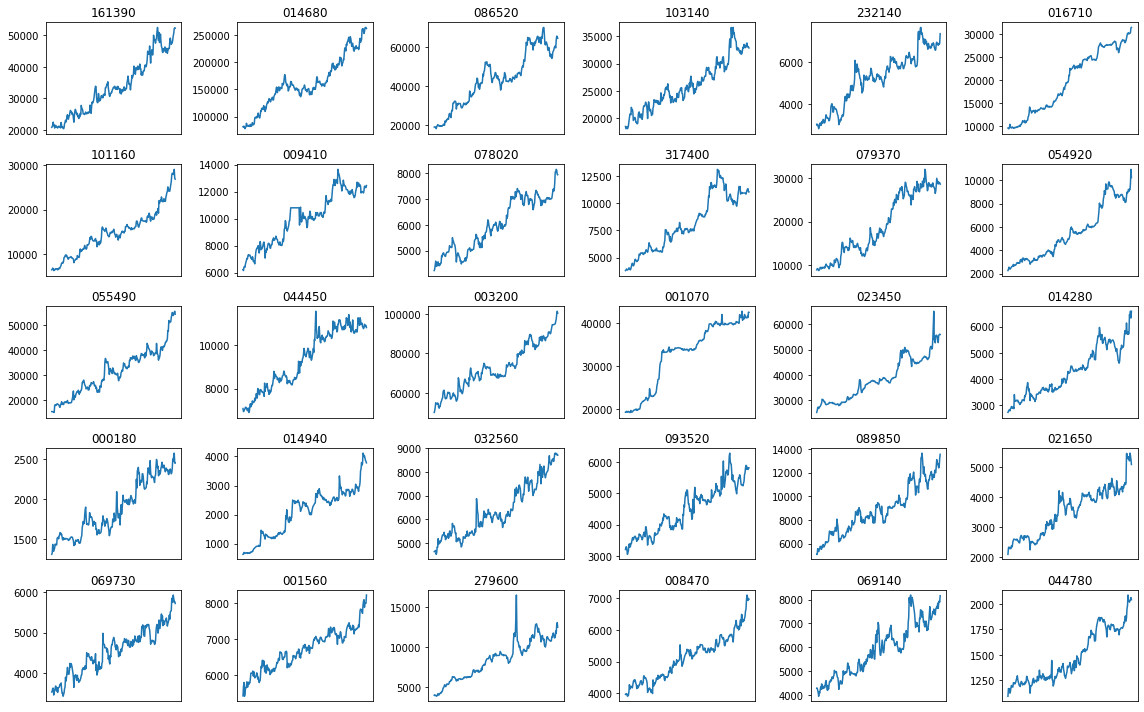

In [204]:
import matplotlib.pyplot as plt

select_K = KOR_price.iloc[-252:, invest_K]
x = select_K.index.values

fig, axes = plt.subplots(5, 6, figsize=(16, 10), sharex=True, sharey=False)

for n, ax in enumerate(axes.flatten()):    
    ax.plot(x, select_K.iloc[:, n])                   
    ax.set_title(select_K.columns[n], size = 12)

plt.xticks([])
fig.tight_layout() 
plt.show()

대부분의 종목이 장기간 동안 꾸준히 상승하는 종목임을 확인할 수 있습니다.

## 12.4 밸류 전략

가치주 효과란 내재 가치 대비 낮은 가격의 주식(저PER, 저PBR 등)이, 내재 가치 대비 비싼 주식보다 수익률이 높은 현상(Basu 1977)을 뜻합니다. 가치 효과가 발생하는 원인에 대한 이론은 다음과 같습니다.

1. 위험한 기업은 시장에서 상대적으로 낮은 가격에 거래되며, 이러한 위험을 감당하는 대가로 수익이 발생합니다.
2. 투자자들의 성장주에 대한 과잉 반응으로 인해 가치주는 시장에서 소외되며, 제자리를 찾아가는 과정에서 수익이 발생합니다.

기업의 가치를 나타내는 지표는 굉장히 많지만, 일반적으로 PER, PBR, PCR, PSR이 많이 사용됩니다.

### 12.4.1 가치지표 별 누적 수익률

먼저 기업의 가치 여부를 판단할 때 가장 많이 사용되는 지표인 PBR을 기준으로 구성된 포트폴리오의 수익률을 비교해보겠습니다. 프렌치 라이브러리에서 해당 데이터의 이름은 'Portfolios_Formed_on_BE-ME' 입니다. B/M에서 B는 장부가치(Book Value), M는 시장가치(Market Value)로써, 이는 PBR의 역수라고 생각해도 됩니다. 즉 해당값이 높을수록 저PBR 주식입니다.

In [4]:
import pandas_datareader.data as web

df_pbr = web.DataReader('Portfolios_Formed_on_BE-ME', 'famafrench', start = '1900-01-01')[0]

df_pbr.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
Date,,,,,,,,,,,,,,,,,,,
1926-07,12.07,5.56,1.92,1.06,3.19,5.41,1.77,2.44,0.60,4.63,1.24,11.40,1.68,1.50,2.09,2.73,1.58,0.63,0.52
1926-08,-9.73,2.64,2.64,6.09,1.00,4.01,2.05,4.58,7.10,0.15,2.18,6.40,2.38,1.58,2.63,4.46,4.94,8.31,3.92
1926-09,-15.16,1.29,0.06,-0.71,-1.03,3.05,-0.30,-0.17,-1.46,-0.11,-2.30,6.32,0.73,-0.89,0.38,-0.28,0.17,-2.16,0.44
1926-10,-5.63,-3.59,-2.42,-3.59,-2.88,-2.96,-2.21,-4.18,-4.28,-3.78,-1.63,-5.01,-1.41,-2.31,-2.10,-4.65,-2.80,-5.46,-1.17
1926-11,5.58,3.13,2.92,3.13,4.11,2.57,1.89,3.96,2.48,6.03,1.49,1.11,3.63,1.97,1.80,4.00,3.85,2.77,1.76


기존의 모멘텀과는 다르게 열이 상당히 많습니다. 각 열에 대한 설명은 다음과 같습니다.

- <=0: PBR이 0 이하인 기업들의 포트폴리오
- Lo 30, Med 40, Hi 30: PBR 기준 상위 30%, 30-70%, 하위 30%로 나눈 포트폴리오
- Lo 20, Qnt 2, Qnt 3, Qnt 4, Hi 20: PBR 기준 상위 20%, 20-40%, 40-60%, 60-80%, 80-100%로 나눈 포트폴리오
- Lo 10, Dec 2, Dec 3, ..., Dec 9, Hi 19: PBR 기준 상위 10% 씩으로 나눈 포트폴리오

이 중 20%씩 나눈 [Lo 20, Qnt 2, Qnt 3, Qnt 4, Hi 20] 열만 선택하여 누적 수익률을 확인해보겠습니다.

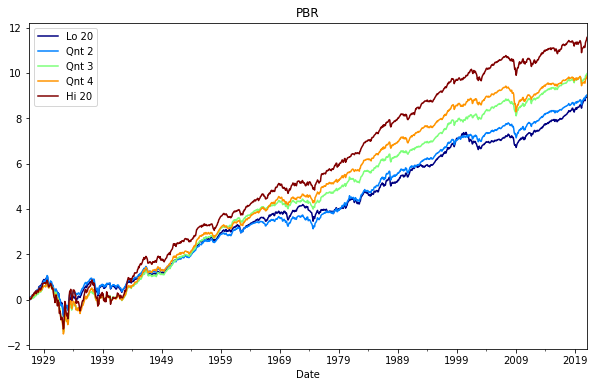

In [12]:
import matplotlib.pyplot as plt
from matplotlib import cm

df_pbr = df_pbr.loc[:, ['Lo 20', 'Qnt 2', 'Qnt 3', 'Qnt 4', 'Hi 20']]
df_pbr_cum = np.log(1+df_pbr/100).cumsum()
df_pbr_cum.plot(figsize = (10, 6), colormap=cm.jet, title = 'PBR')
plt.show()

B/M 값이 높을 수록, 즉 PBR이 낮을 수록 수익률이 높은 가치주 효과가 확인됩니다.

프렌치 라이브러리에는 B/M(PBR) 외에도 E/P(PER), CF/P(PCR) 데이터도 존재하므로, 해당 지표역시 누적 수익률을 확인해보도록 하겠습니다. 먼저 PER의 역수에 해당하는 E/P 지표의 누적 수익률은 다음과 같습니다.

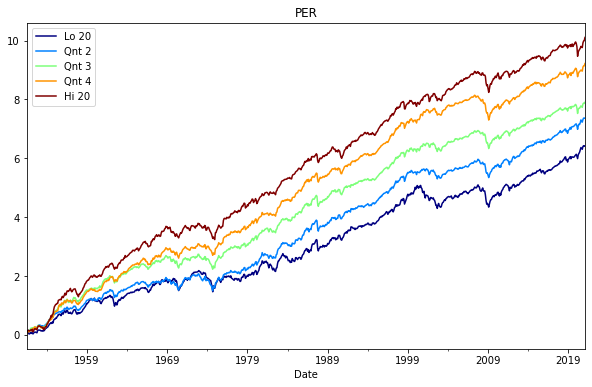

In [15]:
df_per = web.DataReader('Portfolios_Formed_on_E-P', 'famafrench', start = '1900-01-01')[0]
df_per = df_per.loc[:, ['Lo 20', 'Qnt 2', 'Qnt 3', 'Qnt 4', 'Hi 20']]
df_per_cum = np.log(1+df_per/100).cumsum()
df_per_cum.plot(figsize = (10, 6), colormap=cm.jet, title = 'PER')
plt.show()

Hi 20, 즉 PER가 낮을 수록 수익률이 높습니다. 이번에는 PCR의 역수에 해당하는 CF/P 지표의 누적 수익률을 살펴보겠습니다.

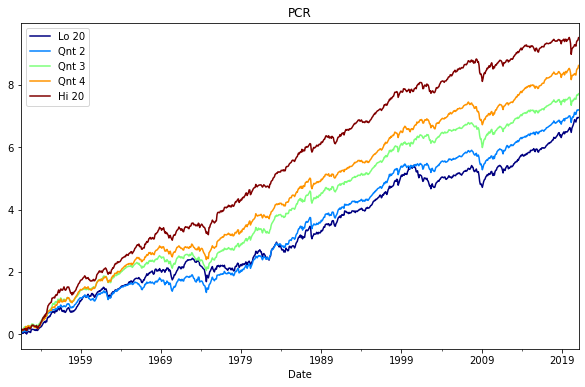

In [17]:
df_pcr = web.DataReader('Portfolios_Formed_on_CF-P', 'famafrench', start = '1900-01-01')[0]
df_pcr = df_pcr.loc[:, ['Lo 20', 'Qnt 2', 'Qnt 3', 'Qnt 4', 'Hi 20']]
df_pcr_cum = np.log(1+df_pcr/100).cumsum()
df_pcr_cum.plot(figsize = (10, 6), colormap=cm.jet, title = 'PCR')
plt.show()

역시나 Hi 20, 즉 PCR이 낮을 수록 수익률이 높습니다. 즉, PBR 뿐만 아니라 PER, PCR과 같은 모든 지표에서 가치주 효과가 나타납니다.

### 12.4.2 밸류 포트폴리오 구하기: 저PBR

먼저 국내 기업 중 저 PBR을 기준으로 종목을 선정해보도록 하겠습니다.

In [3]:
import pandas as pd
import numpy as np

KOR_ticker = pd.read_csv('data/KOR_ticker.csv', index_col=0)
KOR_ticker['종목코드'] = KOR_ticker['종목코드'].astype(np.str).str.zfill(6)

KOR_value = pd.read_csv('data/KOR_value.csv', index_col=0)
KOR_value.index = KOR_value.index.astype(np.str).str.zfill(6)

invest_pbr = (KOR_value['PBR'].rank() <= 30).values
invest_pbr_df = KOR_ticker[invest_pbr][['종목코드', '종목명']]
invest_pbr_df['PBR'] = KOR_value.loc[invest_pbr, ['PBR']].round(4).values

invest_pbr_df

,종목코드,종목명,PBR
23,015760,한국전력,0.2171
117,001040,CJ,0.1804
136,000880,한화,0.1270
291,003380,하림지주,0.2505
304,000150,두산,0.1056
321,012630,HDC,0.1705
383,009970,영원무역홀딩스,0.2363
441,032190,다우데이타,0.1610
491,071320,지역난방공사,0.2516
607,003300,한일홀딩스,0.2023


1. 저장해둔 티커 정보와 가치 지표를 불러옵니다.
2. `rank()`를 통해 PBR이 낮은 30종목을 선택합니다. 
3. 종목코드와 종목명, PBR을 확인합니다.

홀딩스 등 지주사가 그 특성상 저PBR 포트폴리오에 많이 구성되어 있습니다.

### 12.4.3 각 지표 결합하기

이번에는 PER, PBR, PCR, PSR 모든 지표를 고려한 밸류 포트폴리오를 짜보도록 하겠습니다. 먼저 각 지표 별 상관관계를 살펴봅시다.

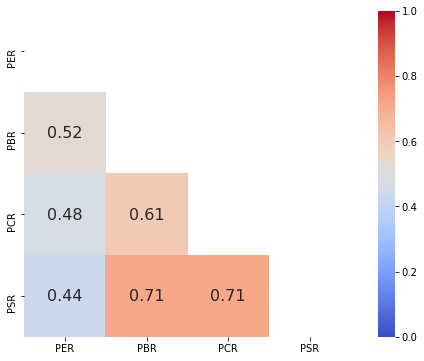

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

rank_value  = KOR_value.rank(axis = 0)
mask = np.triu(rank_value.corr())

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(rank_value.corr(), mask = mask, annot = True, annot_kws = {"size" : 16},
            vmin=0, vmax=1, center= 0.5, cmap= 'coolwarm', square = True)
plt.show()

먼저 `rank()` 함수 내 axis=0 을 통해 각 열별로 순위를 구해주며, `heatmap()` 함수를 통해 지표 별 상관관계를 히트맵으로 나타냅니다. 같은 가치지표임에도 불구하고 서로 간의 상관관계가 꽤 낮은 지표도 있습니다. 따라서 지표를 통합적으로 고려하면 분산효과를 기대할 수도 있습니다.

In [23]:
rank_sum = rank_value.sum(axis = 1, skipna = False)
invest_value  = (rank_sum.rank(method = 'first') <= 30).values
invest_value_df = KOR_ticker[invest_value][['종목코드', '종목명']] 

pd.merge(invest_value_df, KOR_value.loc[invest_value].reset_index(), on = '종목코드')

,종목코드,종목명,PER,PBR,PCR,PSR
0,015760,한국전력,7.704987,0.217117,1.161596,0.261962
1,000880,한화,10.991377,0.126975,0.682551,0.046144
2,018670,SK가스,3.616976,0.505580,4.201074,0.217561
3,003380,하림지주,15.817968,0.250454,1.290829,0.112030
4,000070,삼양홀딩스,7.660125,0.363499,3.191979,0.317105
5,009970,영원무역홀딩스,5.894891,0.236282,1.384316,0.216897
6,009410,태영건설,0.859301,0.739732,0.503217,0.209712
7,002020,코오롱,2.740095,0.476247,1.228148,0.083656
8,084690,대상홀딩스,4.443890,0.293578,2.697746,0.103690
9,000140,하이트진로홀딩스,5.954604,0.362195,1.050525,0.170927


1. 행 방향으로 종목별 랭킹들의 합을 구해주며, skipna = False를 통해 NA가 있는 종목은 제외합니다.
2. 네 개 지표 랭킹의 합 기준 랭킹이 낮은 30종목을 선택합니다. 즉 하나의 지표보다 네 개 지표가 골고루 낮은 종목을 선택합니다.
3. 해당 종목들의 티커, 종목명과 가치지표를 묶어줍니다.

## 12.5 퀄리티 전략

벤자민 그레이엄 이후 유지되고 있는 기본적 분석 혹은 가치 투자자들의 가장 중요한 투자 지표 중 하나는 기업의 우량성입니다. 벤저민 그레이엄은 종목 선정에 있어 유동 자산이
풍부하여 재무적으로 건전하고, 꾸준하게 이익을 달성하는 기업을 강조했습니다. 최고의 투자자로 꼽히는 워런 버핏의 종목 선정 기준 역시 실적의 강력한 성장 추세와 높은 자기자본 이익률로 알려져 있습니다.

연구에 따르면 기업의 우량성이 높은 종목의 수익률이 상승하는 경향이 있으며, 이는 주가가 해당 기업의 이익을 충분히 반영하지 못하는 경향이 있기 때문입니다(Sloan 1996). 퀄리티 전략은 우량성이 우수한 종목을 선택하는 것이며, 주로 재무제표 데이터가 사용됩니다.

### 12.5.1 F-Score

F-Score 지표는 조셉 피오트로스키 교수가 발표(Piotroski and others 2000)한 지표입니다. 그는 논문에서, 저PBR을 이용한 밸류 전략은 높은 성과를 기록하지만 재무 상태가 불량한 기업이 많으며, 저PBR 종목 중 재무적으로 우량한 기업을 선정해 투자한다면 성과를 훨씬 개선할 수 있다고 보았습니다.

F-Score에서는 재무적 우량 정도를 수익성(Profitability), 재무 성과(Financial Performance), 운영 효율성(Operating Efficiency)으로 구분해 총 9개의 지표를 선정합니다. {numref}`f_score`는 이를 요약한 테이블입니다.

```{table} F-Score 요약
:name: f_score
| 지표 | 항목 |  점수 |
| --- | --- | --- |
| 수익성 | ROA | ROA가 양수면 1점 |
|    | CFO | CFO가 양수면 1점 |
|    | ΔROA | ROA가 증가했으면 1점 |
|    | ACCRUAL | CFO > ROA면 1점 |
| 재무 성과 | Δ Lever | 레버리지가 감소했으면 1점 |
|    | Δ LIQUID | 유동성이 증가했으면 1점 |
|    | EQ_OFFER | 발행주식수가 감소했으면 1점 |
| 운영 효율성 | Δ MARGIN | 매출총이익률이 증가했으면 1점 |
|    | Δ TURN | 회전율이 증가했으면 1점 |
```

각 지표가 우수할 경우 1점, 그렇지 않을 경우 0점을 매겨, 총 0점부터 9점까지의 포트폴리오를 구성합니다.

In [39]:
import pickle
import pandas as pd
import numpy as np

KOR_ticker = pd.read_csv('data/KOR_ticker.csv', index_col=0)
KOR_ticker['종목코드'] = KOR_ticker['종목코드'].astype(np.str).str.zfill(6)    

with open('data/KOR_fs.pickle', 'rb') as f:
    KOR_fs = pickle.load(f)

먼저 티커와 재무제표 파일을 불러옵니다. 재무제표 데이터는 피클 파일로 저장되어 있으며, `pickle.load()` 함수를 이용해 딕셔너리 형태 그대로 불러올 수 있습니다.

In [40]:
# 수익성
ROA = KOR_fs['지배주주순이익'] / KOR_fs['자산']
CFO = KOR_fs['영업활동으로인한현금흐름'] / KOR_fs['자산']
ACCURUAL = CFO - ROA

# 재무성과
LEV = KOR_fs['장기차입금'] / KOR_fs['자산']
LIQ = KOR_fs['유동자산'] / KOR_fs['유동부채']
OFFER = KOR_fs['유상증자']

# 운영 효율성
MARGIN = KOR_fs['매출총이익'] / KOR_fs['매출액']
TURN = KOR_fs['매출액'] / KOR_fs['자산']

지표에 해당하는 내용을 계산해줍니다.

1. ROA는 지배주주순이익을 자산으로 나누어 계산합니다.
2. CFO는 영업활동현금흐름을 자산으로 나누어 계산합니다.
3. ACCURUAL은 CFO와 ROA의 차이를 이용해 계산합니다.
4. LEV(Leverage)는 장기차입금을 자산으로 나누어 계산합니다.
4. LIQ(Liquidity)는 유동자산을 유동부채로 나누어 계산합니다.
5. 우리가 받은 데이터에서는 발행주식수 데이터를 구할 수 없으므로, OFFER에 대한 대용치로 유상증자 여부를 사용합니다.
6. MARGIN은 매출총이익을 매출액으로 나누어 계산합니다.
7. TURN(Turnover)은 매출액을 자산으로 나누어 계산합니다.
8. 다음으로 각 지표들이 조건을 충족하는지 여부를 판단해, 지표별로 1점 혹은 0점을 부여합니다.

In [52]:
from datetime import date

if date.today().month in(1,2,3):
    num_col = KOR_fs['매출액'].columns.str[0:4].get_loc(str(date.today().year - 2))
else:
    num_col = KOR_fs['매출액'].columns.str[0:4].get_loc(str(date.today().year - 1))

In [53]:
F_1 = (ROA.iloc[:, num_col] > 0 ) * 1
F_2 = (CFO.iloc[:, num_col] > 0 ) * 1
F_3 = ((ROA.iloc[:, num_col]  - ROA.iloc[:, (num_col - 1)]) > 0) * 1
F_4 = (ACCURUAL.iloc[:, num_col] > 0 ) * 1
F_5 = ((LEV.iloc[:, num_col]  - LEV.iloc[:, (num_col - 1)]) <= 0) * 1
F_6 = ((LIQ.iloc[:, num_col]  - LIQ.iloc[:, (num_col - 1)]) > 0) * 1
F_7 = ((OFFER.iloc[:, num_col]).isnull() | (OFFER.iloc[:, num_col] <= 0)) * 1
F_8 = ((MARGIN.iloc[:, num_col]  - MARGIN.iloc[:, (num_col - 1)]) > 0) * 1
F_9 = ((TURN.iloc[:, num_col]  - TURN.iloc[:, (num_col - 1)]) > 0) * 1

num_col 변수에 원하는 열의 위치를 구해줍니다. 1월\~3월에 데이터를 받을 경우 일부 종목에서만 전년도 재무제표가 들어오는 경향이 있으므로, 전전년도 데이터를 사용해야 합니다. (4월 초반에도 전년도 재무제표가 완벽하게 들어오지 않을 수 있으므로 주의해야 합니다.) 따라서 `date.today().month`를 통해 현재 날짜가 1월\~3월인 경우 열 이름이 2년전 년도를 포함하는 부분을(예: 만일 오늘이 2021년 1월 이라면 열 이름중 2019가 포함된 곳), 그렇지 않을 경우(4~12월) 열 이름이 1년전 년도를 포함하는 부분을(예: 만일 오늘이 2021년 5월 이라면 열 이름중 2020가 포함된 곳) 선택합니다.

다음으로 F-Score의 각 지표에 해당하는 점수를 매기며, 그 기준은 다음과 같습니다.

1. ROA가 양수면 1점, 그렇지 않으면 0점
2. 영업활동현금흐름이 양수면 1점, 그렇지 않으면 0점
3. 최근 ROA가 전년 대비 증가했으면ROA[, num_col] > 0 1점, 그렇지 않으면 0점
4. ACCURUAL(CFO - ROA)이 양수면 1점, 그렇지 않으면 0점
5. 레버리지가 전년 대비 감소했으면 1점, 그렇지 않으면 0점
6. 유동성이 전년 대비 증가했으면 1점, 그렇지 않으면 0점
7. 유상증자 항목이 없거나 0이면 1점, 그렇지 않으면 0점
8. 매출총이익률이 전년 대비 증가했으면 1점, 그렇지 않으면 0점
9. 회전율이 전년 대비 증가했으면 1점, 그렇지 않으면 0점

In [54]:
F_Table = pd.concat([F_1, F_2, F_3, F_4, F_5, F_6, F_7, F_8, F_9], axis = 1)
F_Score = F_Table.sum(axis = 1)
F_count = pd.DataFrame(F_Score).value_counts(sort = False)
F_count / F_count.sum()

0    0.004098
1    0.045993
2    0.094262
3    0.143898
4    0.186703
5    0.191257
6    0.156193
7    0.102004
8    0.065118
9    0.010474
dtype: float64

1. 각 점수를 열의 형태로 묶어줍니다.
2. 종목 별 점수를 더해 F-Score를 계산합니다.
3. `value_counts()` 함수를 통해 F-Score별 빈도를 계산합니다.
4. 합계로 나누어 비중을 계산합니다.

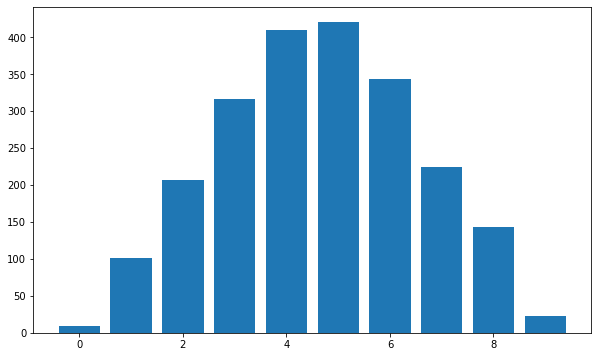

In [55]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
plt.bar(x = np.arange(10), height = F_count)
plt.show()

점수별 비중을 살펴보면 3-6점에 상당히 많은 종목이 분포하고 있음이 확인됩니다.

In [56]:
invest_F_Score = (F_Score == 9)

invest_F_df = KOR_ticker[invest_F_Score.values][['종목코드', '종목명']]
invest_F_df['F-Score'] = F_Score[invest_F_Score].values

invest_F_df

,종목코드,종목명,F-Score
1,000660,SK하이닉스,9
38,009830,한화솔루션,9
62,021240,코웨이,9
64,011070,LG이노텍,9
123,000080,하이트진로,9
276,103140,풍산,9
412,195870,해성디에스,9
576,000140,하이트진로홀딩스,9
668,001790,대한제당,9
711,067900,와이엔텍,9


F-Score가 9점인 종목의 티커와 종목명을 확인해봅니다. 이는 재무적으로 매우 우량하다고 판단되는 종목입니다.

### 12.5.2 수익성 지표 결합하기

퀄리티는 투자자들이 매우 중요하게 생각하는 요소입니다. 그러나 어떠한 지표가 기업의 퀄리티를 나타내는지 한 마디로 정의하기에는 너무나 주관적이고 광범위해 쉽지 않습니다. 애스니스는 연구를 통해(Asness et al. 2019) 수익성, 성장성, 안정성이 높을 주식일수록 수익률이 높은 경향이 있음을 보였습니다. 

이 외에도 학계 혹은 업계에서 사용되는 우량성 관련 지표는 다음과 같이 요약할 수 있습니다. (Hsu, Kalesnik, and Kose 2019)

1. Profitability (수익성)
2. Earnings stability (수익의 안정성)
3. Capital structure (기업 구조)
4. Growth (수익의 성장성)
5. Accounting quality (회계적 우량성)
6. Payout/dilution (배당)
7. Investment (투자)

이 중 연구에 따르면 수익성이 수익률과 가장 연관성이 높은 것으로 나타납니다. 수익성 지표에는 전통적으로 자기자본이익률(ROE)가 사용되지만 그 외에 매출총이익(Novy Marx 2013), 영업활동현금흐름(Bouchaud et al. 2016) 등이 사용됩니다.

In [58]:
from datetime import date
import numpy as np

if date.today().month in(1,2,3):
    num_col = KOR_fs['매출액'].columns.str[0:4].get_loc(str(date.today().year - 2))
else:
    num_col = KOR_fs['매출액'].columns.str[0:4].get_loc(str(date.today().year - 1))
    
q_roe = (KOR_fs['지배주주순이익'] / KOR_fs['자본']).iloc[:, num_col]
q_gpa = (KOR_fs['매출총이익'] / KOR_fs['자산']).iloc[:, num_col]
q_cfo = (KOR_fs['영업활동으로인한현금흐름'] / KOR_fs['자산']).iloc[:, num_col]

q_profit = pd.concat([q_roe, q_gpa, q_cfo], axis = 1)
q_profit.columns = ['ROE', 'GPA', 'CFO']    

먼저 세 가지 지표에 해당하는 값을 계산한 후, 최근년도 데이터만 선택합니다. 1~3월의 경우 전년도가 아닌 전전년도 회계 데이터를 사용합니다. 그 후 `concat()` 함수를 이용해 지표들을 하나로 묶어줍니다. 

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

rank_quality  = q_profit.rank(ascending = False, axis = 0)
rank_quality.corr().round(4)

,ROE,GPA,CFO
ROE,1.0000,0.4547,0.5052
GPA,0.4547,1.0000,0.4540
CFO,0.5052,0.4540,1.0000


`rank()` 함수를 통해 지표별 랭킹을 구하며, 퀄리티 지표는 높을수록 좋은 내림차순으로 계산해야 하므로 `ascending = False`를 입력합니다. 수익성 지표 역시 서로 간의 상관관계가 낮아, 지표를 통합적으로 고려 시 분산효과를 기대할 수 있습니다.

In [60]:
q_rank_sum = rank_quality.sum(axis = 1, skipna = False)
invest_quality  = (q_rank_sum.rank(method = 'first') <= 30).values
invest_quality_df = KOR_ticker[invest_quality][['종목코드', '종목명']]
 
pd.merge(invest_quality_df, q_profit.loc[invest_quality].reset_index(), on = '종목코드')

,종목코드,종목명,ROE,GPA,CFO
0,021240,코웨이,0.271745,0.724166,0.185804
1,096530,씨젠,0.777073,0.783574,0.350082
2,069080,웹젠,0.198298,0.541920,0.249493
3,030190,NICE평가정보,0.182380,1.209328,0.202820
4,067160,아프리카TV,0.247967,0.673288,0.247603
5,214150,클래시스,0.308562,0.443636,0.277091
6,230360,에코마케팅,0.354990,0.907692,0.262051
7,139670,키네마스터,0.174825,1.806061,0.218182
8,348210,넥스틴,0.320261,0.550645,0.184162
9,215000,골프존,0.169770,0.508032,0.237953


세 개 지표 랭킹의 합 기준 랭킹이 낮은 30종목을 선택합니다. 즉 세 가지 수익 지표가 골고루 높은 종목을 선택합니다. 해당 종목들의 티커, 종목명, ROE, GPA, CFO을 출력해 확인합니다.